<a href="https://colab.research.google.com/github/AnkitChapagain/AnkitChapagain/blob/main/1test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
zip_ref = zipfile.ZipFile("/content/final.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir('/content/final'))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

In [ ]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/final',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/final',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)


Found 63673 images belonging to 49 classes.
Found 7054 images belonging to 49 classes.


In [ ]:
class_indices = train_generator.class_indices
print("Class-to-Index Mapping:")
for label, index in class_indices.items():
    print(f"{label} is at index {index}")

Class-to-Index Mapping:
1 is at index 0
10 is at index 1
11 is at index 2
12 is at index 3
13 is at index 4
14 is at index 5
15 is at index 6
16 is at index 7
17 is at index 8
18 is at index 9
19 is at index 10
20 is at index 11
21 is at index 12
22 is at index 13
23 is at index 14
24 is at index 15
25 is at index 16
26 is at index 17
27 is at index 18
28 is at index 19
29 is at index 20
30 is at index 21
31 is at index 22
32 is at index 23
33 is at index 24
34 is at index 25
35 is at index 26
36 is at index 27
37 is at index 28
38 is at index 29
39 is at index 30
40 is at index 31
41 is at index 32
42 is at index 33
43 is at index 34
44 is at index 35
45 is at index 36
46 is at index 37
47 is at index 38
48 is at index 39
49 is at index 40
50 is at index 41
51 is at index 42
52 is at index 43
53 is at index 44
54 is at index 45
55 is at index 46
56 is at index 47
57 is at index 48


In [ ]:
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolution layer and pooling (optional, for deeper feature extraction)
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Fully connected layers
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.4))  # Dropout to reduce overfitting
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=64, activation='relu'))

# Output layer for 49 classes
classifier.add(Dense(units=NUM_CLASSES, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
epochs = 50
history = classifier.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    batch_size=BATCH_SIZE
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1990/1990 ━━━━━━━━━━━━━━━━━━━━ 170s 81ms/step - accuracy: 0.1426 - loss: 3.2431 - val_accuracy: 0.8143 - val_loss: 0.6791
Epoch 2/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 193s 80ms/step - accuracy: 0.6819 - loss: 0.9503 - val_accuracy: 0.8838 - val_loss: 0.3909
Epoch 3/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 192s 75ms/step - accuracy: 0.7895 - loss: 0.6438 - val_accuracy: 0.9202 - val_loss: 0.3003
Epoch 4/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 151s 76ms/step - accuracy: 0.8317 - loss: 0.5174 - val_accuracy: 0.9175 - val_loss: 0.3083
Epoch 5/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 203s 76ms/step - accuracy: 0.8600 - loss: 0.4317 - val_accuracy: 0.9399 - val_loss: 0.2500
Epoch 6/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 159s 80ms/step - accuracy: 0.8775 - loss: 0.3829 - val_accuracy: 0.9314 - val_loss: 0.2609
Epoch 7/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 203s 80ms/step - accuracy: 0.8921 - loss: 0.3420 - val_accuracy: 0.9371 - val_loss: 0.2299
Epoch 8/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 159s 79ms/step - accuracy: 0.9021 - lo

In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 49)                  │           3,185 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,049,845 (19.26 MB)

 Trainable params: 1,683,281 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,366,564 (12.84 MB)

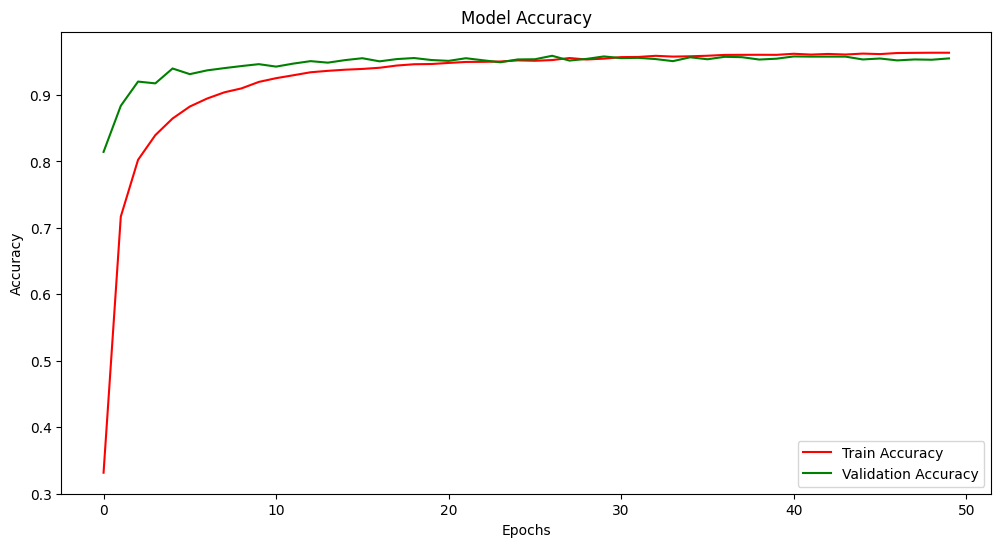

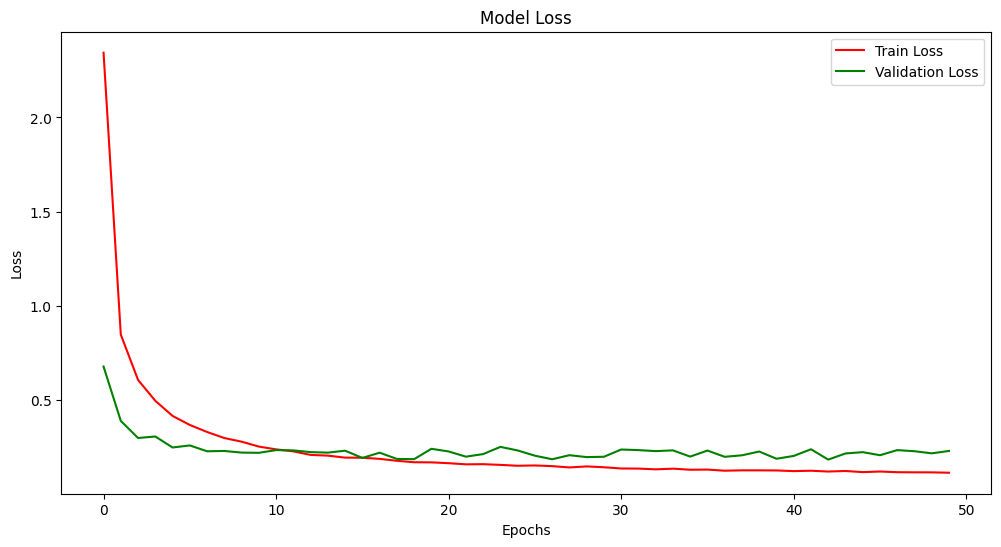

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='green', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

# Assuming 'model' is your trained model
# Step 2: Save the model
# Assuming 'model' is your trained model
# Step 2: Save the model in HDF5 format
classifier.save('/content/my_model.h5')

# Step 3: Download the model to your local machine
from google.colab import files
files.download('/content/my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
validation_steps = validation_generator.samples // BATCH_SIZE
y_pred = classifier.predict(validation_generator, steps=validation_steps)
y_pred_classes = np.argmax(y_pred, axis=1)

220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step


In [ ]:
y_true = validation_generator.classes[:len(y_pred_classes)]

In [ ]:
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, target_names=class_indices.keys())
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.03      0.05      0.04       154
          10       0.02      0.03      0.02       153
          11       0.02      0.02      0.02       156
          12       0.01      0.01      0.01       168
          13       0.01      0.01      0.01       171
          14       0.03      0.03      0.03       167
          15       0.02      0.02      0.02       167
          16       0.03      0.04      0.04       166
          17       0.04      0.04      0.04       168
          18       0.04      0.05      0.05        95
          19       0.02      0.02      0.02       113
          20       0.03      0.03      0.03       105
          21       0.01      0.01      0.01       169
          22       0.00      0.00      0.00       113
          23       0.02      0.02      0.02       133
          24       0.02      0.02      0.02       162
          25       0.03      0.02      0.03       176
    

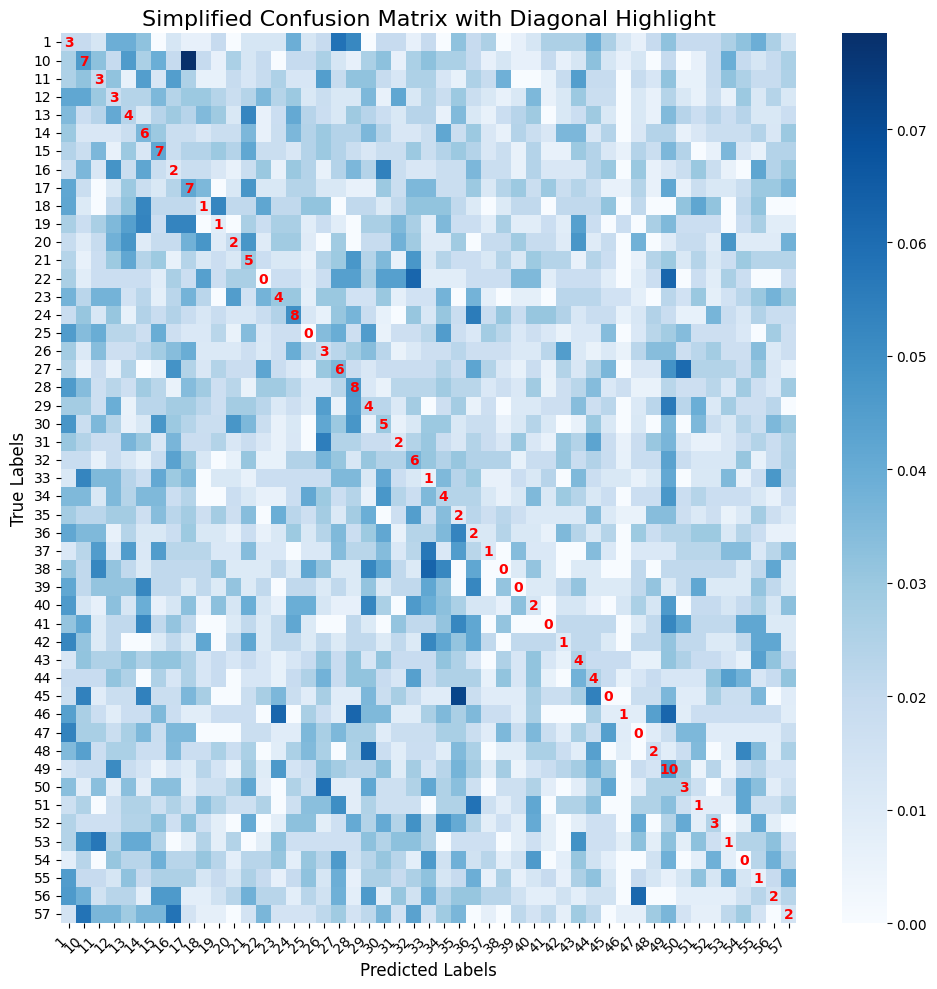

In [ ]:
# Normalize Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot Simplified Confusion Matrix with Diagonal Highlight Only
plt.figure(figsize=(10, 10))  # Adjust size for better visualization
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())

# Highlight the diagonal by overlaying diagonal values with bold annotation
for i in range(len(cm)):
    plt.text(i + 0.5, i + 0.5, f"{cm[i, i]}", color='red',
             ha='center', va='center', fontweight='bold', fontsize=10)

# Add title and labels
plt.title('Simplified Confusion Matrix with Diagonal Highlight', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Display the plot
plt.tight_layout()  # Adjust layout for clarity
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model('/content/my_model.h5')

# Prediction function for new images
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE, color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = classifier.predict(img_array)
    predicted_class = list(class_indices.keys())[np.argmax(prediction)]
    return predicted_class

# Test prediction
test_image_path = '/content/5000.jpg'  # Replace with an actual test image path
predicted_label = predict_image(test_image_path)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
Predicted Label: 31


In [ ]:
accuracy = np.trace(cm) / np.sum(cm)  # Trace gives the sum of diagonal elements
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 2.04%


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(96, activation='relu'),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Save the model's architecture to TensorBoard logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
model.fit(x_train, y_train, epochs=10, callbacks=[tensorboard_callback])

# After training, run TensorBoard to view the architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'NUM_CLASSES' is not defined